In [3]:
%run ../talktools.py

# Meeting/Lecture 17 - March 14

## Office Hours

* Anna: Friday 10:30-11:30am in 219 Campbell 
* Oliva: Monday 1:30-2:30pm in 355 Campbell
* Dan: Tuesday 3:30-4:30pm in 355 Campbell
* TALC: Wednesday 2-4pm in 131 Campbell
* As always, by appointment -- please email us to set up a time


## Agenda

* Introduction (this notebook, *00_Introduction*)
* Wavelength interpolation issue
* Group discussion + report out
* Finish walking through Ness et al. (*01_The_Cannon*)
* Work/question time

## Lab 2
* Checkpoint 1 is now due __today__ by 11:59pm
* Checkpoint 2 due next Thursday (3/21) by 11:59pm
* Spring break: 3/25-3/29
* Checkpoint 3 due Tuesday 4/2 by 11:59pm
* Lab report due Thursday 4/4 by 11:59pm
 

## Getting these notebooks 
```bash
git clone https://github.com/ucb-datalab/course_materials_2024.git
cd course_materials_2024
jupyter notebook
```

## Wavelength interpolation issue
* Essence of the issue: wavelength grid generated from .FITS files and continuum pixels are on slightly different wavelength scales
* Correct way to resolve: interpolate spectrum from FITS files onto provided wavelength grid
 - yields improved continnum normalization
* It turns out that if you don't do this,  you can still do pretty well
 - fits should look OK and scatter/bias/etc are still acceptably small


In [4]:
import numpy as np
import pylab as plt
from astropy.io import fits

# load continuum pixels
continuum = np.load('../../labs/lab2_data/cannon_continuum_apogee.npz')
# load apogee wavelength grid
apogee_wl = np.load('../../labs/lab2_data/apogee_wavelength.npz')

# load example spectrum
hdr = fits.getheader('../../labs/lab2_data/mystery_spec_wiped.fits')
spec = fits.getdata('../../labs/lab2_data/mystery_spec_wiped.fits')

# build wavelength grid from spectrum file
wl = 10**np.arange(hdr['crval1'], hdr['crval1']+len(spec)*hdr['cdelt1'], hdr['cdelt1'])


# interpolate specturm onto new grid
new_spec = np.interp(apogee_wl['wavelength'], wl, spec)

In [10]:
len(spec)

8575

Text(0, 0.5, 'Flux (Arbitrary units)')

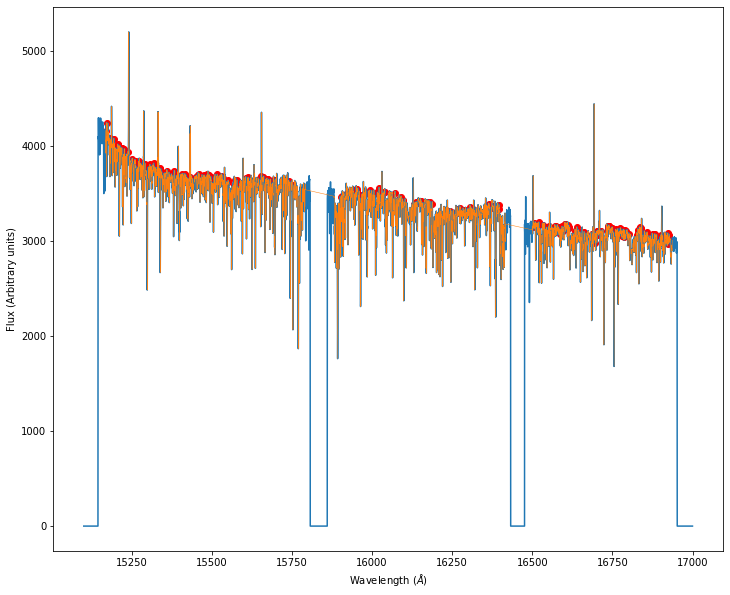

In [5]:
plt.figure(figsize=(12,10))
plt.plot(wl, spec)
plt.plot(apogee_wl['wavelength'], new_spec, lw=0.5
        )
plt.scatter(continuum['wavelengths'][continuum['trusted']], new_spec[continuum['trusted']], c='r' )
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (Arbitrary units)')

Text(0, 0.5, 'Flux (Arbitrary units)')

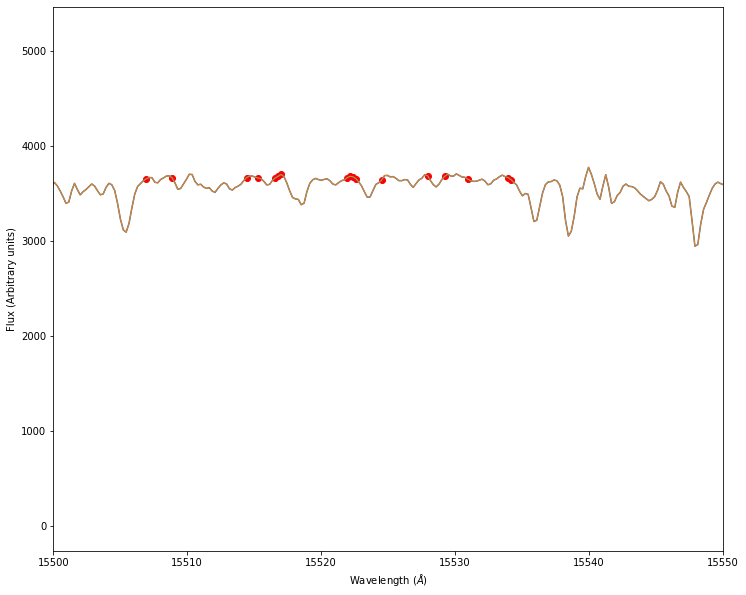

In [6]:
plt.figure(figsize=(12,10))
plt.plot(wl, spec)
plt.plot(apogee_wl['wavelength'], new_spec, lw=1
        )
plt.scatter(continuum['wavelengths'][continuum['trusted']], new_spec[continuum['trusted']], c='r' )
plt.xlim(15500, 15550)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flux (Arbitrary units)')

In [ ]:
students = ["Arabhi A.", "Kennedy B.", "Pallas B.", "Ali F.",
            "Noah F.", "Jillian G.", "Enmanuel H.", "Rose H.",
            "Serli H.", "Vivian K.", "Sangeeta K.",
            "Vy L.", "Matthew L.", "Youxun L.", "Neo M.", 
            "Tess M.", "Saahit M.", "Hien N.", "Sumana N.", "Zcjanin O.", 
            "David P.", "Angel T.", "Asher W.", "Kasey Z.", "Yijun Z." ]

In [ ]:
print(f"Today we have {len(students)} students.")
print(f"There are no name conflicts: {len(students) == len(set(students))}")

In [ ]:
n_groups = 5 # 4 groups of 4, 2 groups of 5

In [ ]:
import numpy as np
class_seed =  8   # let's set this together
rnd = np.random.RandomState(class_seed)

In [ ]:
import copy

shuffled_students = copy.copy(students)
rnd.shuffle(shuffled_students)
shuffled_students

In [ ]:
for group_num, members in enumerate(np.array_split(shuffled_students,  n_groups)):
    print(f"Group {group_num}: {', '.join(list(members))}")

## Checkpoint 1 discussion topics
* How easy/challenging was it to access the data? How did it compare to using ADQL?
* Do you understand the physical meanings of T$_{\rm eff}$, log(g), and [Fe/H]?
* Do you have any better understanding of bitmasks?
* Does your normalized continnuum look reasonable to you?
* Do you have questions on linear models and/or optimization yet?